In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class System:

    def __init__(self):
        self.A = np.array([[0, 1], [0, 0]], dtype=np.float64)
        self.B = np.array([[0], [1]], dtype=np.float64)
        self.C = np.array([[1, 0]], dtype=np.float64)
        self.D = np.array([[0]], dtype=np.float64)
        self.dt = 0.01

        self.x = np.array([[0], [0]], dtype=np.float64)

    def step(self, x, u):
        return x + self.dt * (self.A @ x + self.B @ u)
    
    def output(self, x, u):
        return self.C @ x + self.D @ u
    
    def simulate(self, u):
        self.x = self.step(self.x, u)
        return self.output(self.x, u)
    
    def reset(self):
        self.x = np.array([[0], [0]], dtype=np.float64)

In [8]:
class KalmanFilter:

    def __init__(self, A, B, C, D, Q, R):
        self.A = A
        self.B = B
        self.C = C
        self.D = D
        self.Q = Q
        self.R = R
        self.P = np.eye(A.shape[0])
        self.x = np.zeros((A.shape[0], 1))

    def predict(self, u):
        self.x = self.A @ self.x + self.B @ u
        self.P = self.A @ self.P @ self.A.T + self.Q

    def update(self, y):
        S = self.C @ self.P @ self.C.T + self.R
        K = self.P @ self.C.T @ np.linalg.inv(S)
        self.x = self.x + K @ (y - self.C @ self.x)
        self.P = (np.eye(self.A.shape[0]) - K @ self.C) @ self.P

    def step(self, u, y):
        self.predict(u)
        self.update(y)
        return self.x
    
    def reset(self):
        self.P = np.eye(self.A.shape[0])
        self.x = np.zeros((self.A.shape[0], 1))
        

In [24]:
Q = 1e1 * np.eye(2)
R = 1e-1 * np.eye(1)

system = System()
filter = KalmanFilter(system.A, system.B, system.C, system.D, Q, R)

Ys = []
Yhats = []
Xs = []

def noisy_output(y, std):
    return y + np.random.normal(0, std)

for i in range(1000):
    u = np.array([[0.5]], dtype=np.float64)
    y = system.simulate(u)
    noisy_y = noisy_output(y, 1.0)
    xhat = filter.step(u, noisy_y)
    
    Ys.append(y)
    Yhats.append(noisy_y)
    Xs.append(xhat)

Ys = np.array(Ys).reshape(-1, 1)
Yhats = np.array(Yhats).reshape(-1, 1)
Xs = np.array(Xs).reshape(-1, 2)

In [25]:
print(Ys.shape)
print(Yhats.shape)
print(Xs.shape)

(1000, 1)
(1000, 1)
(1000, 2)


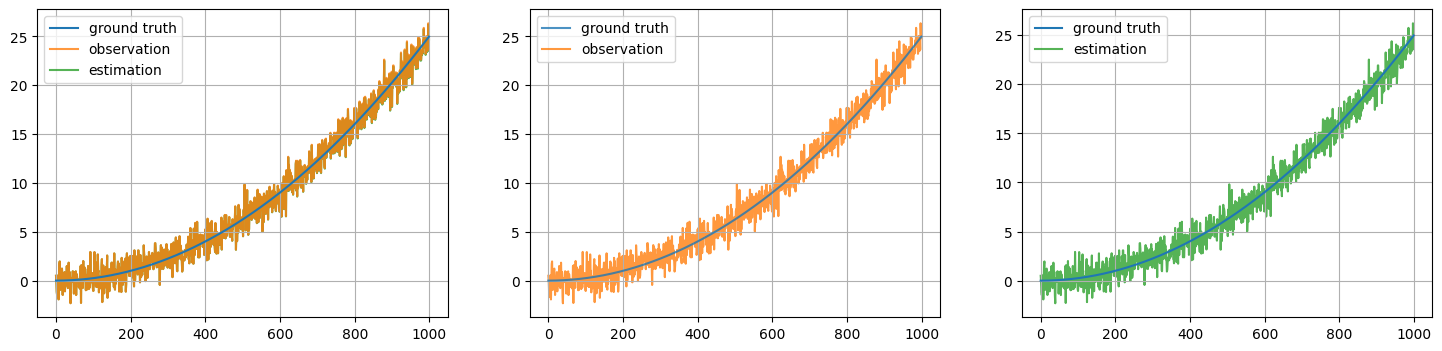

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(Ys, label='ground truth', zorder=2, alpha=1.0, color='tab:blue')
plt.plot(Yhats, label='observation', zorder=1, alpha=0.8, color='tab:orange')
plt.plot(Xs[:, 0], label='estimation', zorder=0, alpha=0.8, color='tab:green')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(Ys, label='ground truth', zorder=2, alpha=0.8, color='tab:blue')
plt.plot(Yhats, label='observation', zorder=1, alpha=0.8, color='tab:orange')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(Ys, label='ground truth', zorder=2, alpha=1.0, color='tab:blue')
plt.plot(Xs[:, 0], label='estimation', zorder=0, alpha=0.8, color='tab:green')
plt.legend()
plt.grid()

plt.show()